In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install keras

In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

2024-06-14 06:00:16.761721: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 06:00:16.761906: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 06:00:16.950910: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape   #500000 no of images,32,32 size of image,3 no of channels

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

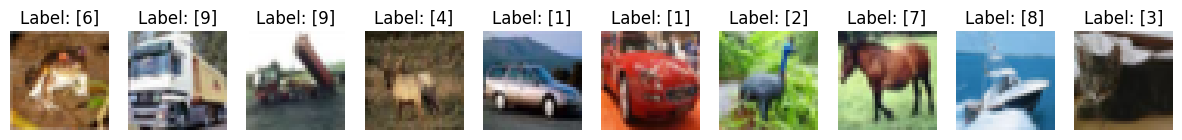

In [6]:
def plot_samples(x, y, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()


plot_samples(x_train, y_train, num_samples=10)

In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models


def create_cnn_model(input_shape=(32, 32, 3)):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=1, padding='valid', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (3, 3), activation='relu', strides=1,padding='valid'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model
model = create_cnn_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 24s 18ms/step - loss: 1.5516 - accuracy: 0.4394 - val_loss: 1.3048 - val_accuracy: 0.5414
Epoch 2/5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2623 - accuracy: 0.5540 - val_loss: 1.2120 - val_accuracy: 0.5708
Epoch 3/5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.1453 - accuracy: 0.5991 - val_loss: 1.1452 - val_accuracy: 0.6016
Epoch 4/5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.0687 - accuracy: 0.6270 - val_loss: 1.1702 - val_accuracy: 0.5904
Epoch 5/5
1250/1250 [==============================] - 21s 17ms/step - loss: 1.0125 - accuracy: 0.6472 - val_loss: 1.0993 - val_accuracy: 0.6157


In [24]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 2s 6ms/step - loss: 1.0886 - accuracy: 0.6182
Test accuracy: 0.6182000041007996


In [26]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1000
           1       0.72      0.77      0.74      1000
           2       0.62      0.34      0.44      1000
           3       0.49      0.40      0.44      1000
           4       0.51      0.63      0.57      1000
           5       0.60      0.44      0.51      1000
           6       0.81      0.57      0.67      1000
           7       0.53      0.81      0.64      1000
           8       0.74      0.72      0.73      1000
           9       0.61      0.79      0.69      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.61     10000
weighted avg       0.63      0.62      0.61     10000



In [27]:
print("Precision_Score: ",precision_score(y_test, y_pred_classes,average='weighted'))
print("Recall_Score: ",recall_score(y_test, y_pred_classes,average='weighted'))
print("F1_Score: ",f1_score(y_test, y_pred_classes,average='weighted'))

Precision_Score:  0.627715022479997
Recall_Score:  0.6182
F1_Score:  0.6102996392823464


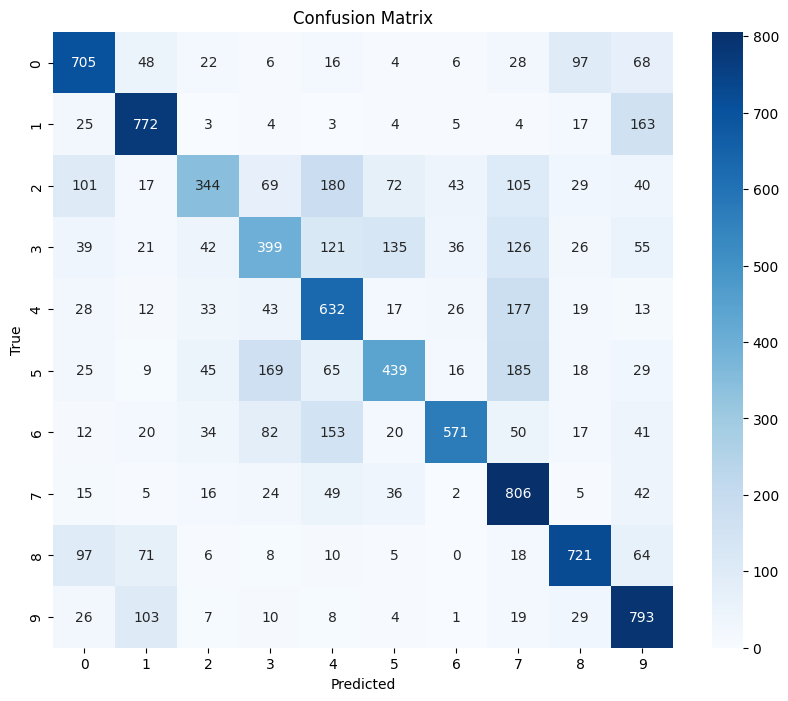

In [28]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()